<module 'matplotlib.pyplot' from 'C:\\Users\\lol1c\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplotlib\\pyplot.py'>

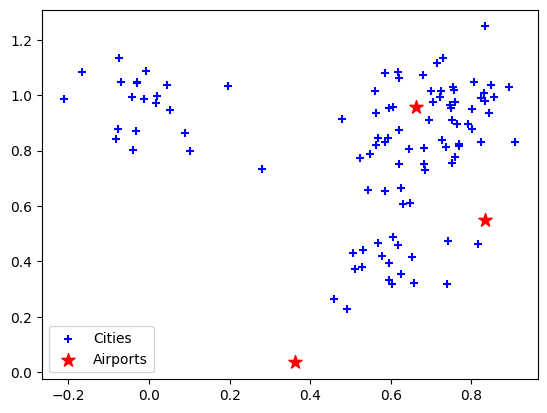

In [158]:
import random
import numpy as np
import math

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

# gererating a set of 100 cities (cities' locations will not change)
for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))

# generating initial random locations for 3 airports
for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

# plotting the initial state
import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

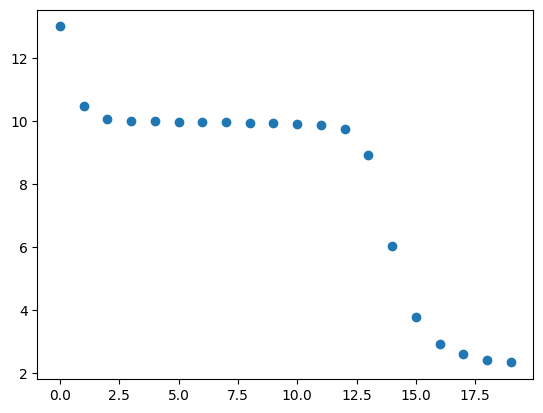

In [159]:
# Objective as a function of epoch
import itertools
"""
a = 0.005 # step size, small positive constant
iterations = 20
a1_cities: set of cities whose closest airport is airport 1
a2_cities: set of cities whose closest airport is airport 2
a3_cities: set of cities whose closest airport is airport 3
z = (x1, y1, x2, y2, x3, y3) # initial state with the coordinates
of 3 airports
fs : list of objective functions thru 20 iterations

def get_closest_cities(z):
returns [a1_cities, a2_cities, a3_cities]

for i in range 20:
a1_cities, a2_cities, a3_cities = get_closest_cities(z)
Compute objective function -> append to fs
Compute the gradient by taking derivative of each coord
Update z’ with new airport locations

plot the objective function at every time of updating the locations
Plot the final state space
"""

def distance(city, airport):
    dist = math.sqrt((city[0] - airport[0])**2 + (city[1] - airport[1])**2)
    return dist

def get_closest_cities(z):
    closest_cities = [[] for _ in range(num_air)]
    for city in cities:
        min_dist = -1
        min_idx = -1
        air_idx = 0
        
        for airport in z:
            dist_to_air = distance(city,airport)
            if min_dist == -1 or dist_to_air < min_dist:
                min_dist = dist_to_air
                min_idx = air_idx
                
            air_idx += 1

        closest_cities[min_idx].append(city)

    return closest_cities

def objective_funct(closest_cities,airports):
    f = 0
    for i in range(0,num_air):
        for c in closest_cities[i]:
            xi, yi = airports[i][0], airports[i][1]
            xc, yc = c[0], c[1]
            f += (xi - xc)**2 + (yi - yc)**2
    return f

fs = []
for i in range(20):
    closest_cities = get_closest_cities(airports)
    fs.append(objective_funct(closest_cities,airports))
    # Compute the gradient by taking derivative of each coord
    gradient = []
    for airport in range(len(airports)):
        gradient_points = [0,0]
        for city in closest_cities[airport]:
            gradient_points[0] += airports[airport][0] - city[0]
            gradient_points[1] += airports[airport][1] - city[1]
        gradient_points[0] *= 2
        gradient_points[1] *= 2
        
        gradient.append(tuple(gradient_points))

    for airport in range(len(airports)):
        zx_prime = airports[airport][0] - 0.01*gradient[airport][0]
        zy_prime = airports[airport][1] - 0.01*gradient[airport][1]
       
        airports[airport] = (zx_prime,zy_prime)


plt.plot(fs,'o')
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\lol1c\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplotlib\\pyplot.py'>

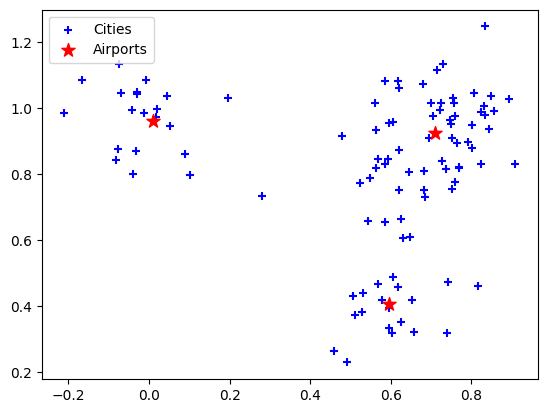

In [160]:
# An optimal state
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt